# Classification and Regression Trees; Tree Ensembles

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [139]:
# a. pick any data sets you have previously perofromed REGRESSION and fit a REGRESSION TREE

In [140]:
from sklearn.linear_model import LogisticRegression as LogR

In [141]:
df_cov=pd.read_csv("COVID19_line_list_data.csv")

In [142]:
df_cov.head(5)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
# create a LIST using the columns as features of this data set

#features= list(df_cov[['id','summary', 'location', 'gender', 'country', 'age']])
features= list(df_cov[['age']])
features

['age']

In [144]:
# drop the na value from age column
df_cov.dropna(subset=['age'], inplace=True)


In [145]:
# convert the gender using function
df_cov["gender"]= df_cov["gender"].apply(lambda x: 1 if x == 'male' else 0)

In [150]:
# use gender and death for regression analysis
x_val= np.array(df_cov[["age"]])
y_val= np.array(df_cov["death"].apply(lambda x: 0 if x == '0' else 1))

In [151]:
classes=np.unique(x_val)
x_val

array([[66.  ],
       [56.  ],
       [46.  ],
       [60.  ],
       [58.  ],
       [44.  ],
       [34.  ],
       [37.  ],
       [39.  ],
       [56.  ],
       [18.  ],
       [32.  ],
       [37.  ],
       [51.  ],
       [57.  ],
       [56.  ],
       [50.  ],
       [52.  ],
       [33.  ],
       [40.  ],
       [70.  ],
       [51.  ],
       [28.  ],
       [37.  ],
       [19.  ],
       [29.  ],
       [66.  ],
       [46.  ],
       [32.  ],
       [28.  ],
       [55.  ],
       [68.  ],
       [38.  ],
       [72.  ],
       [45.  ],
       [42.  ],
       [33.  ],
       [33.  ],
       [37.  ],
       [69.  ],
       [63.  ],
       [62.  ],
       [49.  ],
       [50.  ],
       [48.  ],
       [36.  ],
       [36.  ],
       [61.  ],
       [69.  ],
       [89.  ],
       [89.  ],
       [66.  ],
       [75.  ],
       [48.  ],
       [82.  ],
       [66.  ],
       [81.  ],
       [82.  ],
       [65.  ],
       [80.  ],
       [53.  ],
       [86.  ],
       [

In [152]:
len(x_val), len(y_val)

(843, 843)

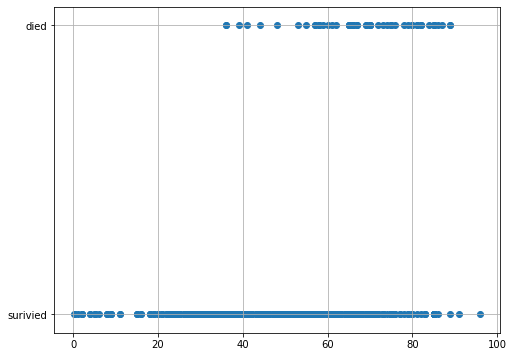

In [153]:
plt.scatter(x_val, y_val)
plt.gcf().set_size_inches(8,6)
plt.yticks([0,1],['surivied','died'])
plt.grid()

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [155]:
# reshape the x value
x_val= x_val.reshape(-1,1)

In [156]:
# using logR to create a fit model
xtrain, xtest, ytrain, ytest= train_test_split(x_val, y_val)

In [157]:
model= LogR()
model.fit(xtrain, ytrain)
ypredict= model.predict(xtest)
accuracy_score(ytest, ypredict)

0.9146919431279621

# using Decision Tree Classifier

In [158]:
from sklearn.tree import DecisionTreeClassifier as DT

In [159]:
# split the data sets into TRAIN and TEST
xtrain, xtest, ytrain, ytest= train_test_split(x_val, y_val)

In [160]:
model_DT= DT(max_depth= 4, criterion= 'entropy')

In [161]:
model_DT.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [162]:
ypredict= model_DT.predict(xtest)
accuracy_score(ytest, ypredict)

0.9146919431279621

In [163]:
# using graph vizulization
import graphviz 
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

In [164]:
dot= export_graphviz(model_DT,
                    rotate= True,
                    filled= True,
                    feature_names= features,
                    class_names=[ str(i) for i in classes] # classes are the unique value of Y(target feautre)
                    )

In [165]:
# now create a python graph
g= pydotplus.graph_from_dot_data(dot)

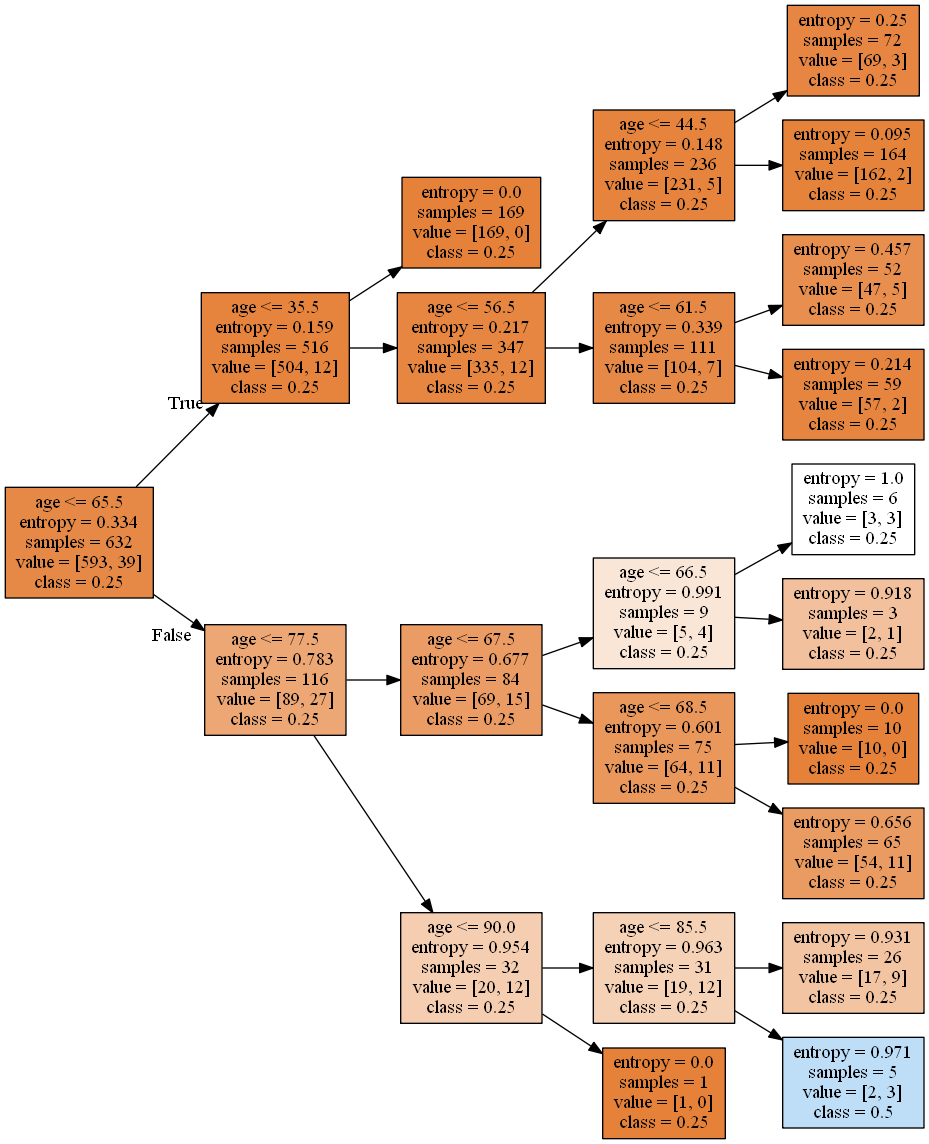

In [166]:
Image(g.create_png())

In [167]:
# using ensmeble methods of Tree classifer
from sklearn.ensemble import BaggingClassifier as BAG

In [168]:
xtrain, xtest, ytrain, ytest= train_test_split(x_val, y_val)

In [169]:
model_bag= BAG(n_estimators= 5)

In [170]:
model_bag.fit(xtrain, ytrain)

BaggingClassifier(n_estimators=5)

In [171]:
ypredict= model_bag.predict(xtest)

In [172]:
accuracy_score(ytest, ypredict)

0.909952606635071

In [173]:
# using Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier as boost

In [174]:
model_boost= boost(n_estimators= 100)
model_boost.fit(xtrain, ytrain)
ypredict= model_boost.predict(xtest)
accuracy_score( ytest, ypredict)

0.9146919431279621

In [175]:
# with less estimator
model_boost= boost(n_estimators= 5)
model_boost.fit(xtrain, ytrain)
ypredict= model_boost.predict(xtest)
accuracy_score( ytest, ypredict)

0.9383886255924171

In [176]:
# USING RANDOM FOREST classifier 
from sklearn.ensemble import RandomForestClassifier as RF

In [177]:
model_rand= RF(n_estimators= 15)
model_rand.fit(xtrain, ytrain)
ypredict= model_rand.predict(xtest)
accuracy_score(ytest, ypredict)

0.9004739336492891

In [178]:
# using less no. of estimators

model_rand= RF(n_estimators= 5)
model_rand.fit(xtrain, ytrain)
ypredict= model_rand.predict(xtest)
accuracy_score(ytest, ypredict)

0.9146919431279621